In [5]:
import pandas as pd
data=pd.read_csv("Mall_Customers.csv")

data=data.drop("CustomerID", axis=1)
data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  #convert Gender values into numerical
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [6]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


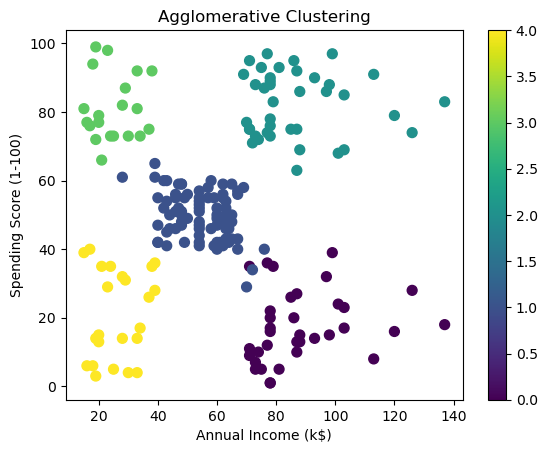

In [11]:
import matplotlib.pyplot as plt

# Assuming 'clust_labels' contains the cluster labels
fig = plt.figure()
ax = fig.add_subplot(111)

# Using the cluster labels obtained from Agglomerative Clustering
scatter = ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clust_labels, s=50)

ax.set_title("Agglomerative Clustering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

plt.show()


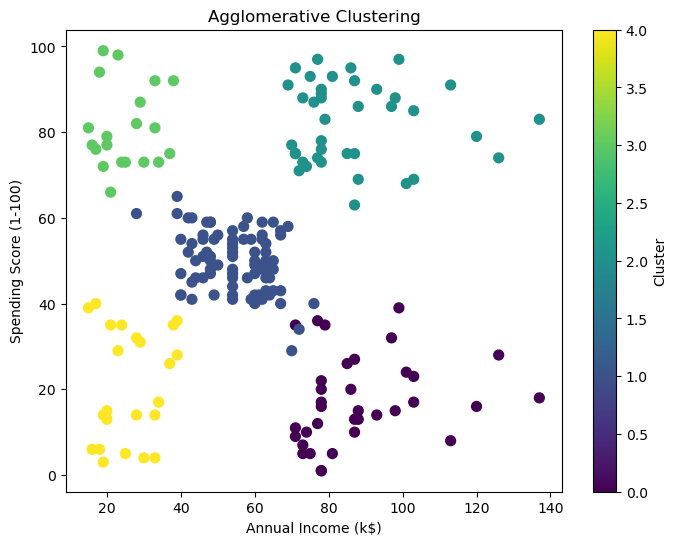

In [17]:
import matplotlib.pyplot as plt

# Assuming 'clust_labels' contains the cluster labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Using the cluster labels obtained from Agglomerative Clustering
scatter = ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clust_labels, s=50, cmap='viridis')

ax.set_title("Agglomerative Clustering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter, label='Cluster')

plt.show()

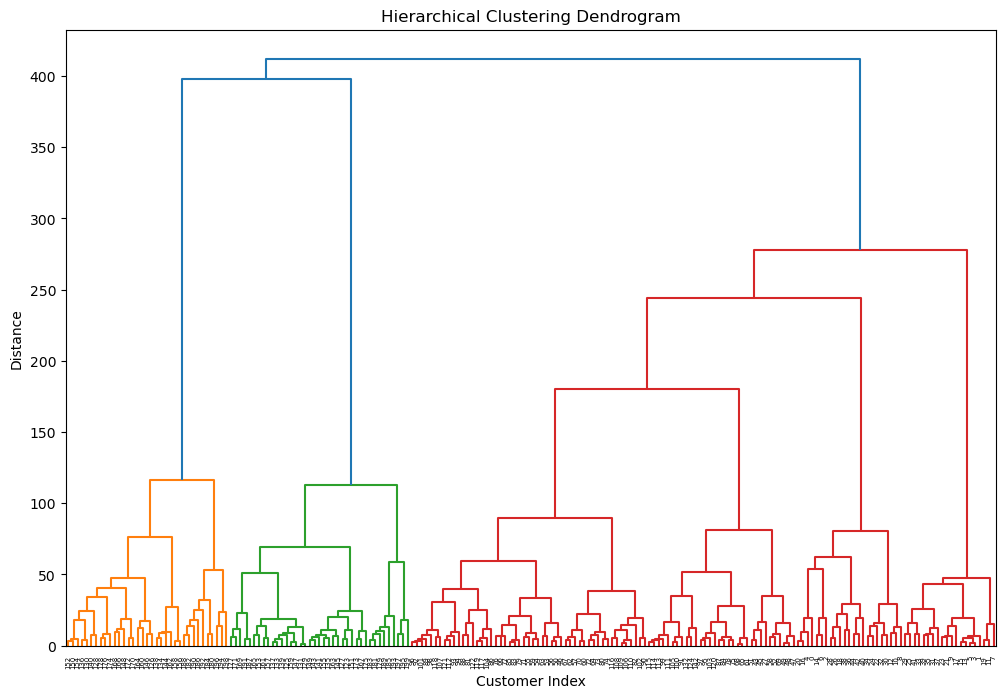

In [18]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load your dataset
# Assuming the dataset is in a CSV file named 'Mall_Customers.csv'
data = pd.read_csv('Mall_Customers.csv')

# Select relevant features
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Perform hierarchical clustering
linkage_matrix = linkage(features, method='ward')  # You can try different linkage methods

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the credit card dataset
# You should replace 'credit_card.csv' with the actual name of your dataset
credit_data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
credit_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
# Select relevant features for clustering
features = credit_data[['Spending Score (1-100)', 'Age', 'Annual Income (k$)']]  # Replace with actual feature names

# Standardize the features if needed
# Standardization might be necessary if features are on different scales
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# features_standardized = scaler.fit_transform(features)
# features = pd.DataFrame(features_standardized, columns=features.columns)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

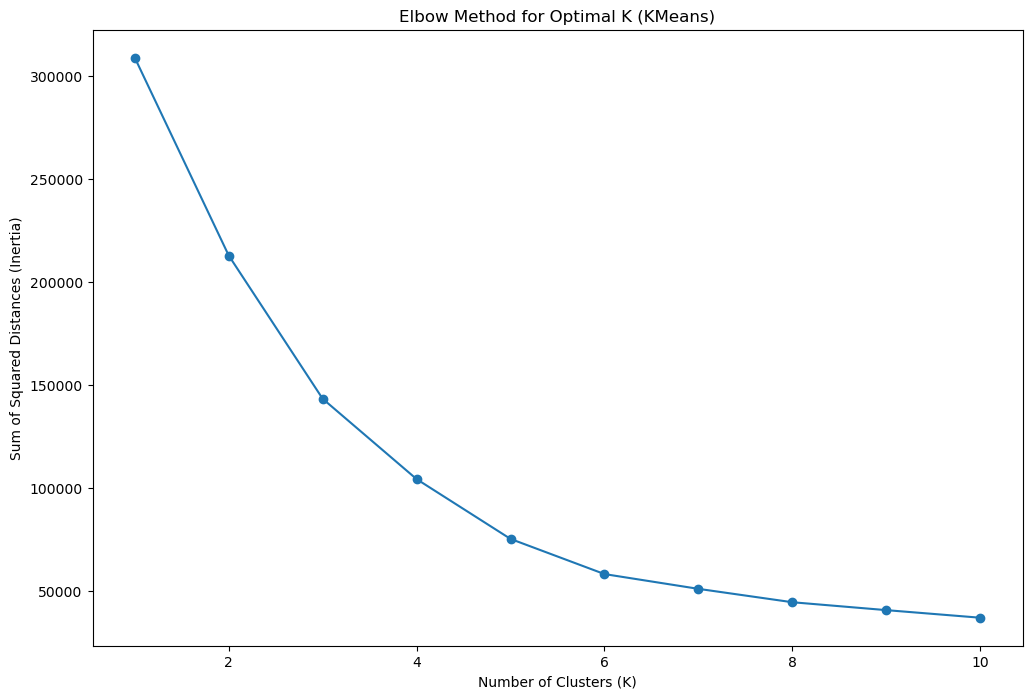

In [25]:
# Cell for KMeans Clustering

# Try different values of K
k_values = range(1, 11)
inertia_values = []

# Perform KMeans clustering for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve for KMeans
plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K (KMeans)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

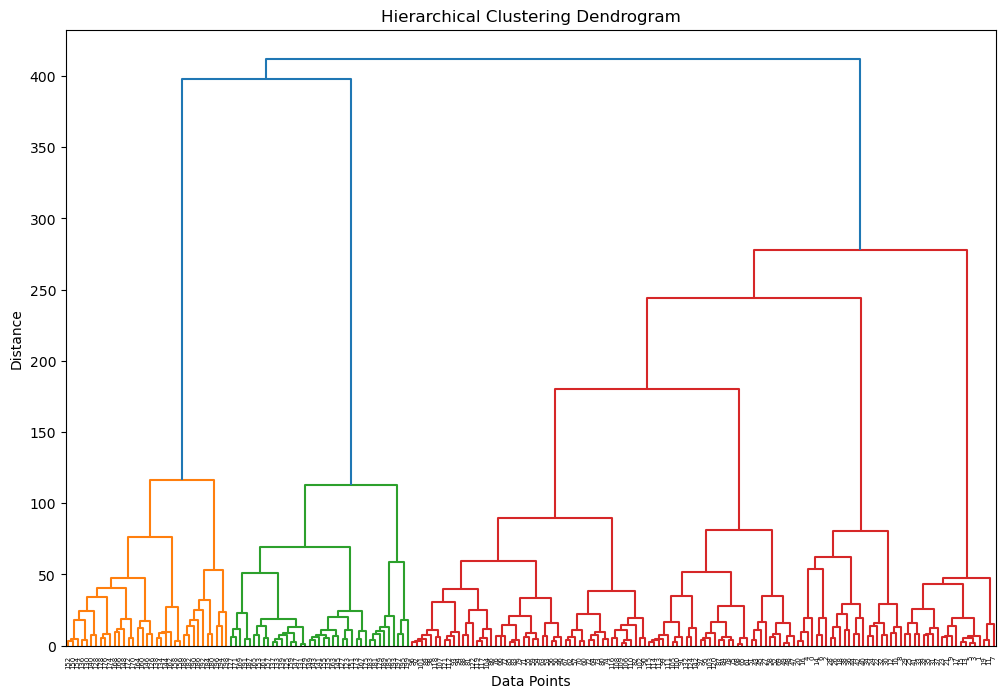

In [26]:
# Cell for Hierarchical Clustering

# Perform hierarchical clustering
linkage_matrix = linkage(features, method='ward')  # You can try different linkage methods

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=credit_data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


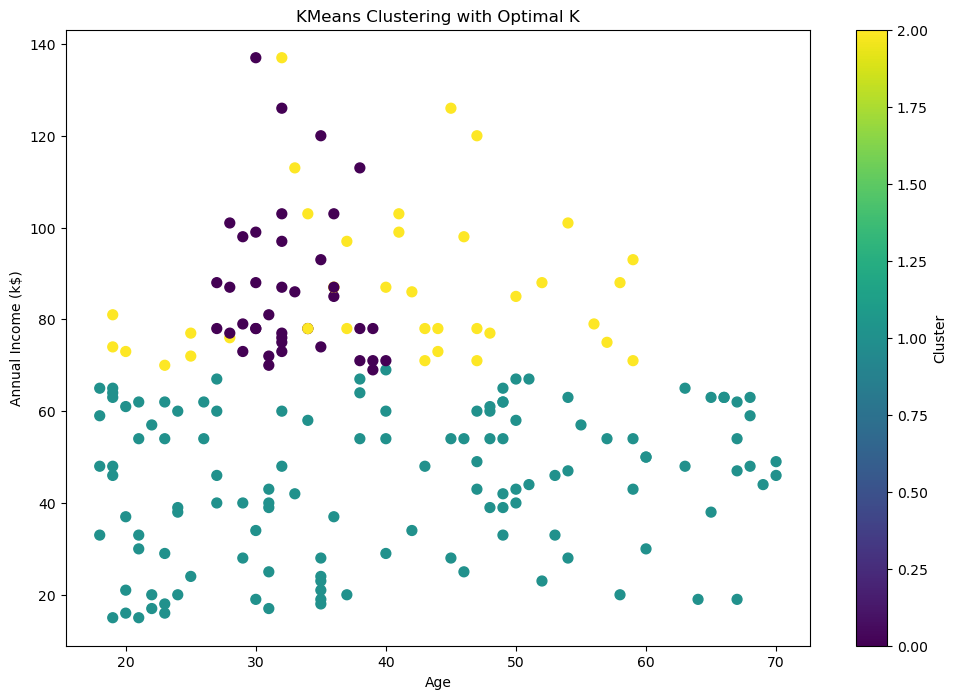

In [27]:
# Cell for KMeans Clustering with Optimal K

# Set the optimal value of K based on the elbow method analysis
optimal_k = 3  # Change this to the optimal value you obtained

# Perform KMeans clustering with the optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
credit_data['KMeans_Cluster'] = kmeans_optimal.fit_predict(features)

# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(credit_data['Age'], credit_data['Annual Income (k$)'], c=credit_data['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering with Optimal K')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: 'c' argument has 198 elements, which is inconsistent with 'x' and 'y' with size 200.

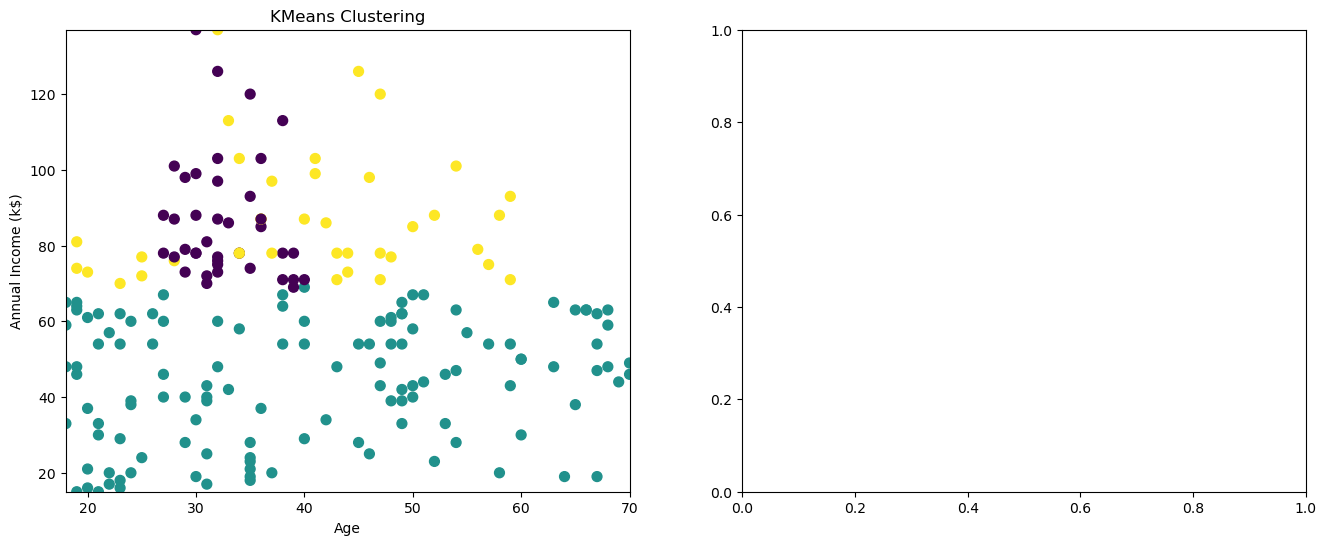

In [28]:
# Compare KMeans and Hierarchical Clustering Results

# Set the optimal value of K for KMeans based on the elbow method analysis
optimal_k_kmeans = 3  # Change this to the optimal value you obtained for KMeans

# Perform KMeans clustering with the optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k_kmeans, random_state=42)
credit_data['KMeans_Cluster'] = kmeans_optimal.fit_predict(features)

# Set the optimal number of clusters for Hierarchical Clustering
optimal_clusters_hierarchical = 3  # Change this to the optimal value you determined for Hierarchical Clustering

# Perform hierarchical clustering
linkage_matrix = linkage(features, method='ward')  # You can try different linkage methods
dendrogram_clusters = pd.cut(pd.Series(linkage(linkage_matrix, method='ward')[:, 2]), optimal_clusters_hierarchical, labels=False)

# Plot the comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KMeans Clustering
axes[0].scatter(credit_data['Age'], credit_data['Annual Income (k$)'], c=credit_data['KMeans_Cluster'], cmap='viridis', s=50)
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Annual Income (k$)')
axes[0].set_xlim(credit_data['Age'].min(), credit_data['Age'].max())
axes[0].set_ylim(credit_data['Annual Income (k$)'].min(), credit_data['Annual Income (k$)'].max())

# Hierarchical Clustering
axes[1].scatter(credit_data['Age'], credit_data['Annual Income (k$)'], c=dendrogram_clusters, cmap='viridis', s=50)
axes[1].set_title('Hierarchical Clustering')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Annual Income (k$)')
axes[1].set_xlim(credit_data['Age'].min(), credit_data['Age'].max())
axes[1].set_ylim(credit_data['Annual Income (k$)'].min(), credit_data['Annual Income (k$)'].max())

plt.tight_layout()
plt.show()